In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("./US_honey_dataset.csv")

In [5]:
df

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...,...
1110,1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


In [6]:
df['state'].value_counts()

state
Alabama          27
Arizona          27
Arkansas         27
California       27
Colorado         27
Florida          27
Georgia          27
Hawaii           27
Idaho            27
Illinois         27
Indiana          27
Iowa             27
Kansas           27
Louisiana        27
Maine            27
Michigan         27
Mississippi      27
Minnesota        27
Montana          27
Missouri         27
NorthCarolina    27
NewYork          27
Nebraska         27
NewJersey        27
Pennsylvania     27
Oregon           27
Ohio             27
NorthDakota      27
Washington       27
WestVirginia     27
Vermont          27
Virginia         27
Tennessee        27
SouthDakota      27
Utah             27
Texas            27
Wisconsin        27
Wyoming          27
Kentucky         26
NewMexico        18
Nevada           15
SouthCarolina    12
Maryland          9
Oklahoma          9
Name: count, dtype: int64

In [7]:
df.isnull().sum()

Unnamed: 0             0
state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [8]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [9]:
df

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...
1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


C:\Users\karan\AppData\Local\Temp\ipykernel_1712\38515326.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ='state',y= 'production', data = df,palette= 'dark')


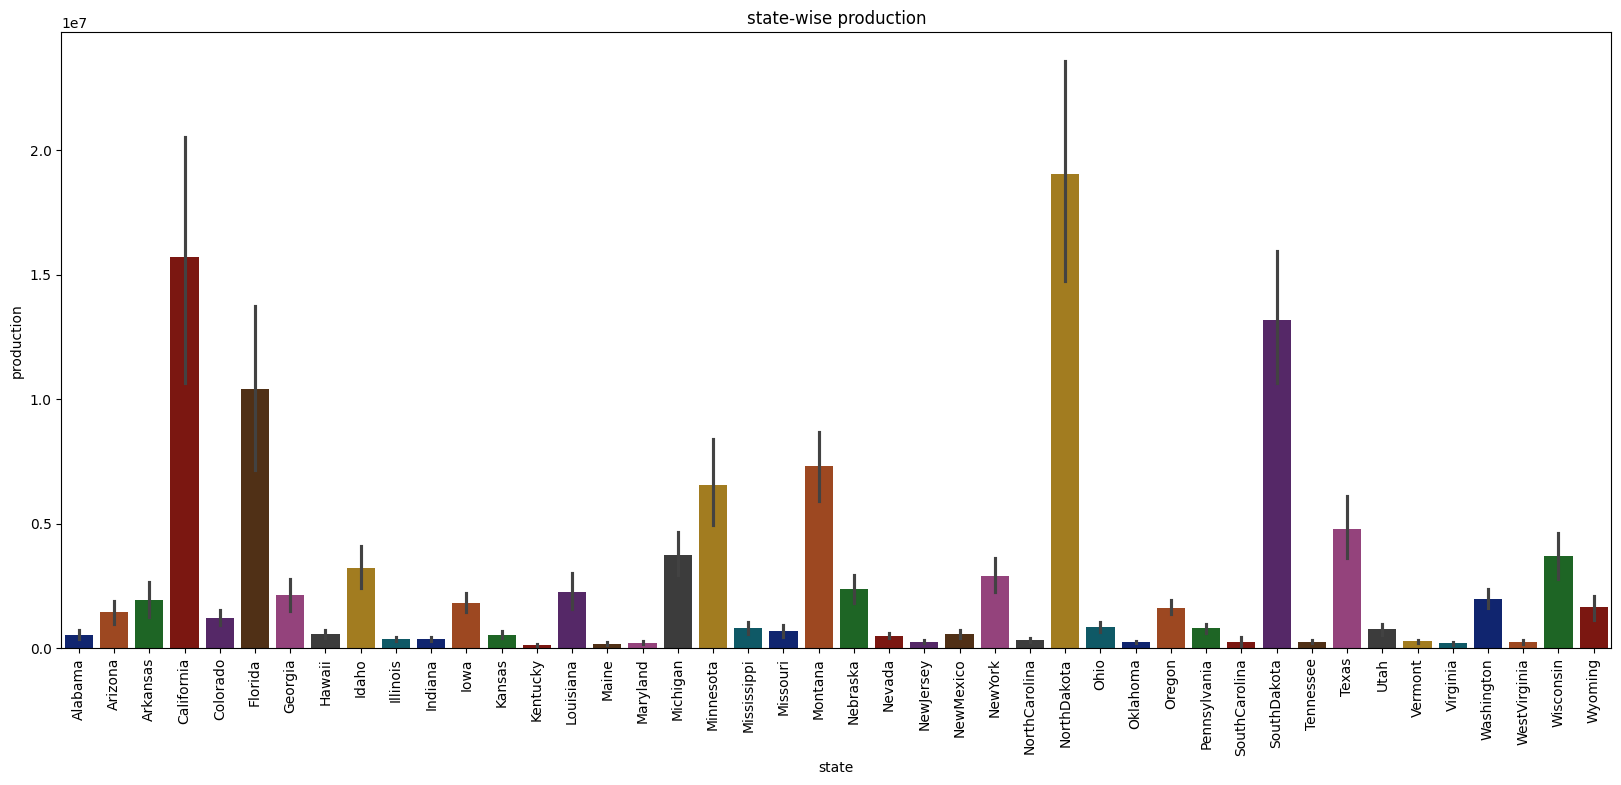

In [10]:
#state wise prediction

plt.figure(figsize = (20,8))
sns.barplot(x ='state',y= 'production', data = df,palette= 'dark')
plt.title('state-wise production')
plt.xlabel('state')
plt.ylabel('production')
plt.xticks(rotation= 90)
plt.show()

1) Which states are least 5 contributing to honey production for the last 27 years?
2) Which are the top 5 Honey producing states in the US ?

In [14]:
x = df.groupby('state')['production'].sum().reset_index()
x

,state,production
0,Alabama,14467000
1,Arizona,38844000
2,Arkansas,51846000
3,California,423876000
4,Colorado,32660000
5,Florida,280934000
6,Georgia,57426000
7,Hawaii,15420000
8,Idaho,87188000
9,Illinois,9864000


In [15]:
top5 = x.sort_values(by = 'production', ascending = False).head()
top5

,state,production
28,NorthDakota,513742000
3,California,423876000
34,SouthDakota,355726000
5,Florida,280934000
21,Montana,197173000


In [24]:
least5 = x.sort_values(by = 'production', ascending= True).head()
least5

,state,production
16,Maryland,1975000
30,Oklahoma,2055000
33,SouthCarolina,2823000
13,Kentucky,3224000
15,Maine,4762000


3) What is the Change in mean Average price of Honey from 1995 to 2021?

In [26]:
y = df.groupby('year')['average_price'].mean()
y

year
1995     74.840909
1996     99.568182
1997     91.325581
1998     83.720930
1999     80.325581
2000     79.023256
2001     88.465116
2002    133.204545
2003    151.068182
2004    132.350000
2005    116.341463
2006    134.341463
2007    140.170732
2008    160.878049
2009    176.195122
2010    192.900000
2011    216.725000
2012    236.700000
2013    260.717949
2014    282.025000
2015    292.625000
2016    291.925000
2017    302.775000
2018      3.083500
2019      2.925500
2020      3.050000
2021      3.334250
Name: average_price, dtype: float64

In [27]:
z = y.loc[1995]- y.loc[2021]
z

np.float64(71.5066590909091)

4) Which was the year when production of Honey in wholeUS was the highest?

In [36]:
a = df.groupby('year')['production'].sum().reset_index()
a

,year,production
0,1995,210272000
1,1996,197995000
2,1997,191176000
3,1998,219321000
4,1999,204585000
5,2000,220320000
6,2001,185403000
7,2002,170732000
8,2003,180741000
9,2004,182379000


In [34]:
top1 = a.sort_values(by = 'production', ascending = False).head(1)
top1

,year,production
5,2000,220320000


5) Which states have the highest no. of colonies in the year 2000?

In [37]:
df

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...
1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


In [56]:
c = df[df['year'] == 2000]
b = c.groupby('state')['colonies_number'].sum().reset_index()
d = b.sort_values(by = 'colonies_number', ascending=False).head(1)
d

,state,colonies_number
3,California,440000
